In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('SBI_LI.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df.shape

(1338, 8)

In [5]:
print(df.describe())

               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  insuranceclaim  
count  1338.000000   1338.000000     1338.000000  
mean      1.515695  13270.422265        0.585202  
std       1.104885  12110.011237        0.492871  
min       0.000000   1121.873900        0.000000  
25%       1.000000   4740.287150        0.000000  
50%       2.000000   9382.0

In [6]:
print(df.groupby('insuranceclaim').size())

insuranceclaim
0    555
1    783
dtype: int64


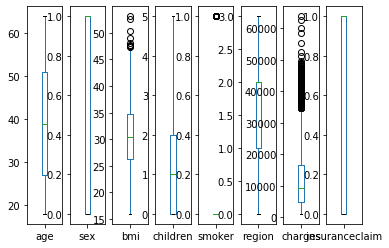

In [7]:
df.plot(kind='box', subplots=True, sharex=False, sharey=False)
pyplot.show()

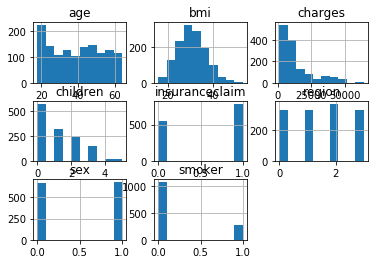

In [8]:
df.hist()
pyplot.show()

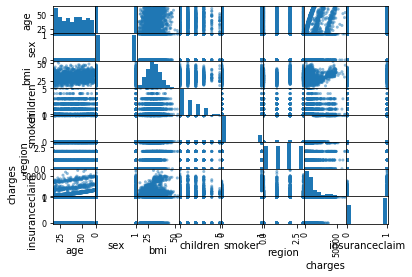

In [9]:
scatter_matrix(df)
pyplot.show()

In [10]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[1.43876426, 1.0105187 , 0.45332   , ..., 1.34390459, 0.2985838 ,
        0.84190989],
       [1.50996545, 0.98959079, 0.5096211 , ..., 0.43849455, 0.95368917,
        0.84190989],
       [0.79795355, 0.98959079, 0.38330685, ..., 0.43849455, 0.72867467,
        1.18777557],
       ...,
       [1.50996545, 1.0105187 , 1.0148781 , ..., 0.43849455, 0.96159623,
        0.84190989],
       [1.29636188, 1.0105187 , 0.79781341, ..., 1.34390459, 0.93036151,
        1.18777557],
       [1.55168573, 1.0105187 , 0.26138796, ..., 0.46691549, 1.31105347,
        0.84190989]])

In [11]:
threshold = 3
print(np.where(z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


In [12]:
df2 = df[(z < 3).all(axis=1)]

In [13]:
df.shape

(1338, 8)

In [14]:
df2.shape

(1309, 8)

In [15]:
X = df.iloc[:,0:7]
Y = df.iloc[:,-1]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

In [16]:
X

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [17]:
Y

0       1
1       1
2       0
3       0
4       1
5       0
6       1
7       0
8       0
9       0
10      1
11      1
12      1
13      1
14      1
15      0
16      1
17      0
18      1
19      1
20      1
21      1
22      1
23      1
24      0
25      1
26      0
27      0
28      1
29      1
       ..
1308    1
1309    0
1310    0
1311    1
1312    1
1313    1
1314    0
1315    0
1316    0
1317    1
1318    0
1319    0
1320    0
1321    1
1322    1
1323    1
1324    0
1325    1
1326    1
1327    1
1328    0
1329    1
1330    1
1331    1
1332    0
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1338, dtype: int64

In [18]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.804635 (0.039198)
LDA: 0.889665 (0.025594)
KNN: 0.632643 (0.028633)
CART: 0.976591 (0.018439)
NB: 0.786894 (0.036286)
SVM: 0.601888 (0.022135)


In [19]:
#we choose Decision Tree as it has highest accuracy score of 97%

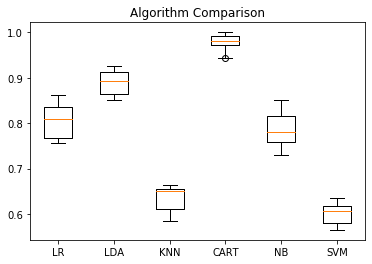

In [20]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [21]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
predictions = model.predict(X_validation)

In [22]:
predictions

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [23]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9888059701492538
[[102   2]
 [  1 163]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       104
           1       0.99      0.99      0.99       164

    accuracy                           0.99       268
   macro avg       0.99      0.99      0.99       268
weighted avg       0.99      0.99      0.99       268



In [24]:
print('actual', Y_validation)
print('predicted',predictions)

actual 559     1
1087    1
1020    1
460     0
802     0
298     1
481     1
616     1
763     1
750     1
48      0
547     1
1143    0
767     0
194     1
424     0
3       0
785     0
443     1
921     1
315     1
725     1
88      1
310     1
471     1
726     0
60      1
1280    1
705     0
101     0
       ..
528     1
409     0
401     1
90      1
573     1
1060    1
382     1
262     1
644     1
1076    1
858     1
752     1
148     1
80      0
336     0
775     0
439     1
78      1
623     1
280     1
35      0
330     1
823     1
1310    0
6       1
682     1
629     1
893     1
807     1
1165    1
Name: insuranceclaim, Length: 268, dtype: int64
predicted [1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0
 1 0 1 0 1 1 1 1 1 0 0 1 

In [25]:
from sklearn.externals import joblib
joblib.dump(model,'Project15_SBI_life_insurance.pkl')

C:\Users\Amitesh.Patel\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Project15_SBI_life_insurance.pkl']